In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Information Mart/orders_products_details/orders_products_details.csv", index_col=0)
df.head(3)

,item_id,product_id,quantity,list_price_x,discount,timestamp_x,source_x,Exchange Rate,list_price_egp,customer_id,...,latency_days,weekend,Unnamed: 0,product_name,brand_id,category_id,model_year,list_price_y,timestamp,source
order_id,,,,,,,,,,,,,,,,,,,,,
1,1,20,1,599.99,0.20,2024-04-28 18:26:15.337129,Database,47.861515,28716.430385,259,...,NaN,True,22,Electra Townie Original 7D EQ - Women's - 2016,1,3,2016,599.99,2024-04-28 17:44:44.813359,DataLake
1,2,8,2,1799.99,0.07,2024-04-28 18:26:15.337129,Database,47.861515,86150.248385,259,...,NaN,True,7,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016,1799.99,2024-04-28 17:44:44.813359,DataLake
1,3,10,2,1549.00,0.05,2024-04-28 18:26:15.337129,Database,47.861515,74137.486735,259,...,NaN,True,9,Surly Straggler - 2016,8,4,2016,1549.00,2024-04-28 17:44:44.813359,DataLake


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4725 entries, 1 to 1615
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         4725 non-null   int64  
 1   product_id      4725 non-null   int64  
 2   quantity        4725 non-null   int64  
 3   list_price_x    4725 non-null   float64
 4   discount        4725 non-null   float64
 5   timestamp_x     4725 non-null   object 
 6   source_x        4725 non-null   object 
 7   Exchange Rate   4725 non-null   float64
 8   list_price_egp  4725 non-null   float64
 9   customer_id     4725 non-null   int64  
 10  order_status    4725 non-null   int64  
 11  order_date      4725 non-null   object 
 12  required_date   4720 non-null   object 
 13  shipped_date    4201 non-null   object 
 14  store_id        4725 non-null   int64  
 15  staff_id        4725 non-null   int64  
 16  timestamp_y     4725 non-null   object 
 17  source_y        4725 non-null   object

In [3]:
df.describe()

,item_id,product_id,quantity,list_price_x,discount,Exchange Rate,list_price_egp,customer_id,order_status,store_id,staff_id,latency_days,Unnamed: 0,brand_id,category_id,model_year,list_price_y
count,4725.000000,4725.000000,4725.000000,4725.000000,4725.000000,4725.000000,4.725000e+03,4725.000000,4725.000000,4725.000000,4725.000000,1346.000000,4725.000000,4725.000000,4725.000000,4725.000000,4725.000000
mean,2.288042,59.626667,1.499683,1444.669788,0.105513,47.861515,6.914408e+04,657.509841,3.770159,1.896085,5.867725,1.340267,61.606772,4.932487,3.763810,2016.634074,1212.898950
std,1.520880,67.459910,0.500053,5032.321347,0.058245,0.000000,2.408545e+05,443.674510,0.702962,0.559722,1.904601,0.473975,69.859750,3.487897,1.989303,0.692025,1356.410074
min,1.000000,2.000000,1.000000,89.990000,0.050000,47.861515,4.307058e+03,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,89.990000
25%,1.000000,14.000000,1.000000,429.000000,0.050000,47.861515,2.053259e+04,239.000000,4.000000,2.000000,6.000000,1.000000,13.000000,1.000000,2.000000,2016.000000,429.000000
50%,2.000000,29.000000,1.000000,599.990000,0.070000,47.861515,2.871643e+04,644.000000,4.000000,2.000000,6.000000,1.000000,31.000000,5.000000,3.000000,2017.000000,599.990000
75%,3.000000,84.000000,2.000000,1549.000000,0.200000,47.861515,7.413749e+04,1050.000000,4.000000,2.000000,7.000000,2.000000,86.000000,9.000000,6.000000,2017.000000,1549.000000
max,60.000000,315.000000,2.000000,259999.000000,0.200000,47.861515,1.244395e+07,1445.000000,4.000000,3.000000,9.000000,2.000000,327.000000,9.000000,7.000000,2018.000000,11999.990000


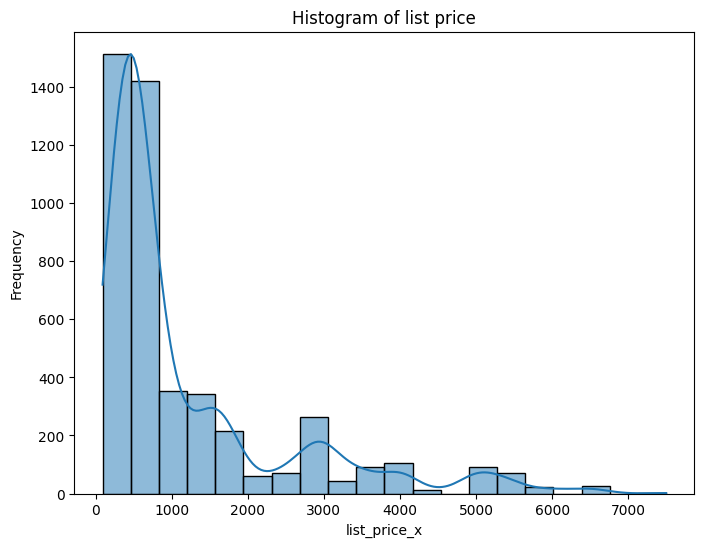

In [4]:
# Plot 1: Histogram of Quantity
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df.list_price_x < 10000], x='list_price_x', bins=20, kde=True)
plt.title('Histogram of list price')
plt.xlabel('list_price_x')
plt.ylabel('Frequency')
plt.show()

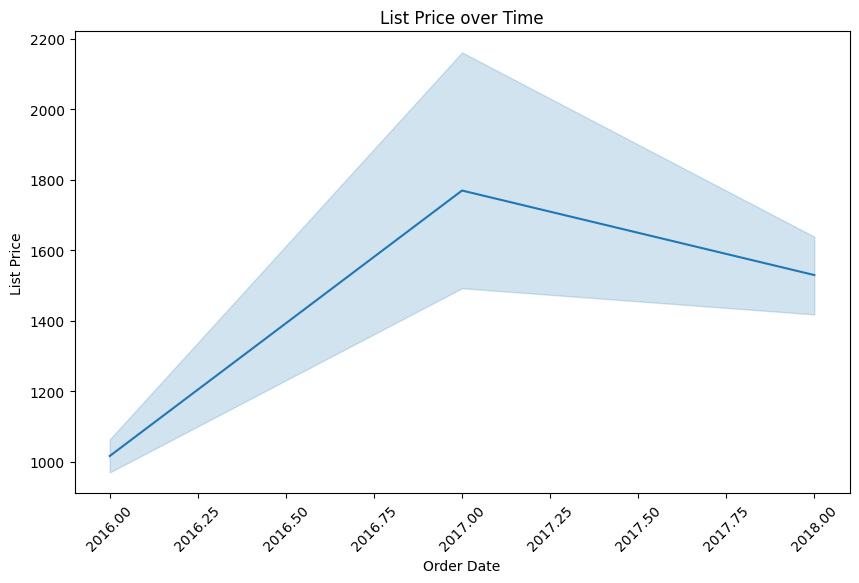

In [5]:
# Plot 2: Line Plot of List Price over Time
plt.figure(figsize=(10, 6))
df['order_date'] = pd.to_datetime(df['order_date'])
# Create a new column 'year' containing the year
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
sns.lineplot(data=df, x='year', y='list_price_x')
plt.title('List Price over Time')
plt.xlabel('Order Date')
plt.ylabel('List Price')
plt.xticks(rotation=45)
plt.show()

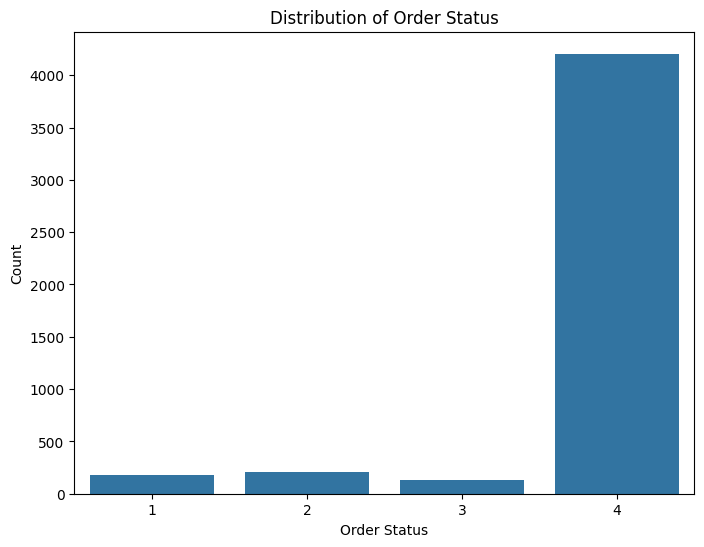

In [6]:
# Plot 3: Bar Plot of Order Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='order_status')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

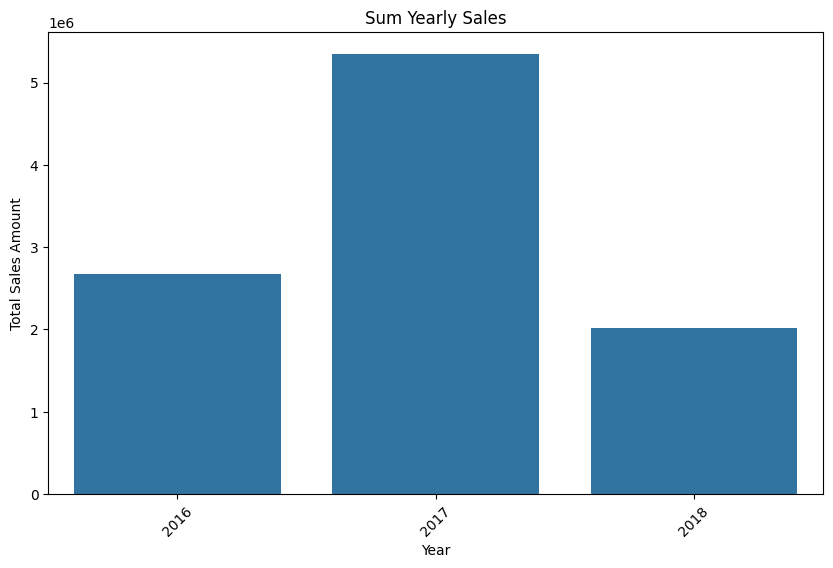

In [7]:
# Plot 4: Bar Chart of Sum Yearly Sales
df['sales_amount'] = df.list_price_x * df.quantity
yearly_sales = df.groupby('year')['sales_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='year', y='sales_amount')
plt.title('Sum Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

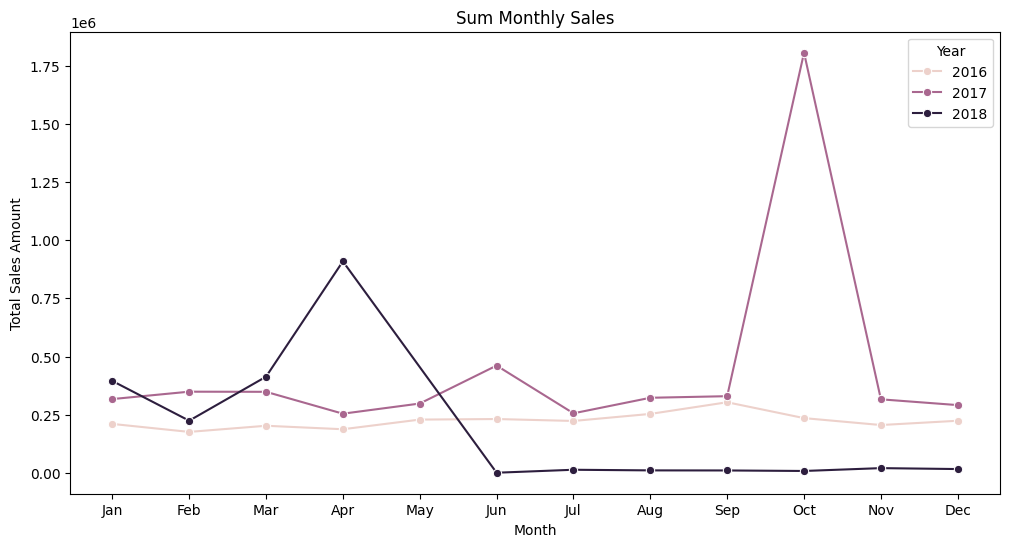

In [8]:
# Plot 5: Line Chart for Sum Monthly Sales
monthly_sales = df.groupby(['year', 'month'])['sales_amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales_amount', hue='year', marker='o')
plt.title('Sum Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()